In [103]:
%matplotlib inline
# Dependencies and Setup

import matplotlib.pyplot as plt

import matplotlib
import numpy as np



import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


In [104]:
# Read the City Data
city_data = pd.read_csv("data/city_data.csv")
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [105]:
# Read the Ride Data
ride_data = pd.read_csv("data/ride_data.csv")
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [106]:
# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, how = "right", on="city")
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [107]:
# Display the data table for preview
combined_data_reorder = combined_data[["city", "date", "fare", "ride_id", "driver_count", "type"]]
combined_data_reorder.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

In [108]:
# Calculate the number of rides by city
number_rides = combined_data_reorder["city"].value_counts()
number_rides.head()

West Angela        39
South Karenland    38
North Jason        35
Port Frank         33
Liumouth           33
Name: city, dtype: int64

In [109]:
# Create new df with number of rides in each city
rides = { 'number of rides': number_rides } 
rides_by_city_df = pd.DataFrame(rides)
rides_by_city_df.head()

,number of rides
West Angela,39
South Karenland,38
North Jason,35
Port Frank,33
Liumouth,33


In [110]:
# Combine number of rides with dataset
total_data = pd.merge(combined_data_reorder, rides_by_city_df, left_on = "city", right_index = True, how = "left")
total_data.head()

,city,date,fare,ride_id,driver_count,type,number of rides
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban,28
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban,28
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban,28
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban,28
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban,28


In [111]:
# Create new df with average fare in each city
average = total_data.groupby("city")["fare"].mean()
average.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [112]:
# Create new df with average fare in each city
average_dic = { 'average': average } 
average_by_city_df = pd.DataFrame(average_dic)
average_by_city_df.head()

,average
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000


In [113]:
# Combine average fare with dataset
total_data2 = pd.merge(total_data, average_by_city_df, left_on = "city", right_index = True, how = "left")
total_data2.head()

,city,date,fare,ride_id,driver_count,type,number of rides,average
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban,28,22.373214
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban,28,22.373214
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban,28,22.373214
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban,28,22.373214
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban,28,22.373214


In [114]:
# Create new df with only the necessary columns
final_data = total_data2.drop_duplicates(['city'],keep='first')
final_data.head()   


,city,date,fare,ride_id,driver_count,type,number of rides,average
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban,28,22.373214
28,Williamsstad,2018-01-23 17:51:24,19.62,125986195523,59,Urban,23,24.362174
51,Port Angela,2018-04-17 06:23:18,16.34,7120534266772,67,Urban,19,23.836842
70,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban,23,28.616957
93,West Robert,2018-02-15 04:21:47,12.28,1442502460354,39,Urban,31,25.123871


In [115]:
# Obtain the x and y coordinates for each of the three city types                                  

x = final_data['number of rides']
y = final_data['average']
size = final_data['driver_count']
color = final_data['type']


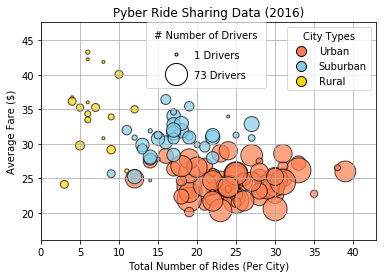

In [116]:
# Build the scatter plot

fig, ax = plt.subplots()

colors = {'Urban':'Coral',
          'Suburban':'SkyBlue',
          'Rural': 'Gold'}

scatter = ax.scatter(x, y, s=size*9, c=color.apply(lambda z: colors[z]), 
                     edgecolors = "black", alpha = .7)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(0,max(x)*1.1)
plt.ylim(min(y)*.8,max(y)*1.1)
plt.grid()

##########################
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Urban',
                          markeredgecolor = 'black',
                          markerfacecolor='Coral', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Suburban',
                          markeredgecolor = 'black',
                          markerfacecolor='SkyBlue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Rural',
                          markeredgecolor = 'black',
                          markerfacecolor='Gold', markersize=10)]

# Create the figure
legend1 = ax.legend(handles=legend_elements, title = "City Types", loc='best')
ax.add_artist(legend1)

#########################
legend_elements2 = [Line2D([0], [0], marker='o', color='w', 
                          label=f'{min(size)} Drivers',
                          markeredgecolor = 'black',
                          markersize=min(size)*3),
#                   Line2D([0], [0], marker='o', color='w', 
#                         label=f'{round((min(size)+((max(size)-min(size))*(1/3))),0)} Drivers',
#                          markeredgecolor = 'black',
#                          markersize=(min(size)+((max(size)-min(size))*(1/3)))/3.3),
#                   Line2D([0], [0], marker='o', color='w', 
#                          label=f'{round((min(size)+((max(size)-min(size))*(2/3))),0)} Drivers',
#                          markeredgecolor = 'black',
#                          markersize=(min(size)+((max(size)-min(size))*(2/3)))/3.3),
                   Line2D([0], [0], marker='o', color='w', 
                          label=f'{max(size)} Drivers',
                          markeredgecolor = 'black',
                          markersize=max(size)/3.3)]

# Create the figure
legend2 = ax.legend(handles=legend_elements2, labelspacing=1.0, ncol=1, title = "# Number of Drivers", 
          loc='center left', borderpad = .8, bbox_to_anchor=(.3, .85))
##########################

# Save Figure
plt.savefig("../Images/Ride_Sharing_Data.png")

plt.show()

## Total Fares by City Type

              fare           ride_id  driver_count  number of rides   average
type                                                                         
Rural      4327.93   580968240341287           537              975   4327.93
Suburban  19356.33  3106884522576766          8570            11505  19356.33
Urban     39854.38  7919412664056093         59602            41911  39854.38


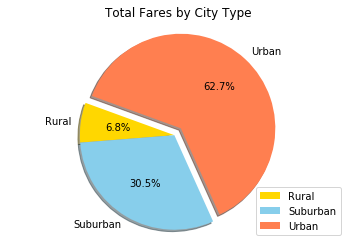

In [117]:
# Calculate Type Percents
#city_type_counts_df = city_data.groupby('type')['city'].count()
#print(city_type_counts_df)

fare_sums_df = total_data2.groupby('type').sum()
print(fare_sums_df)



# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ['Gold', 'SkyBlue', 'Coral']
explode = [0, 0, 0.1]

plt.pie(fare_sums_df['fare'], labels=labels, colors=colors, explode = explode,
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.title("Total Fares by City Type")
plt.legend(labels, loc="lower right")
plt.axis("equal")

# Save Figure
plt.savefig("../Images/Fares_by_city_type.png")

# Show Figure
plt.show()


## Total Rides by City Type

             fare          ride_id  driver_count  number of rides      average
type                                                                          
Rural      630.03   67753078818543            78              125   623.479771
Suburban  1121.80  173788339837996           490              625  1106.542729
Urban     1616.57  297566087300087          2405             1625  1616.942033


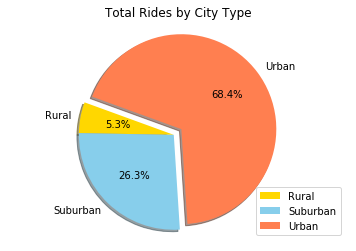

In [118]:
# Calculate Ride Percents
city_type_sums_df = final_data.groupby('type').sum()
print(city_type_sums_df)

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ['Gold', 'SkyBlue', 'Coral']
explode = [0, 0, 0.1]

plt.pie(city_type_sums_df['number of rides'], labels=labels, 
        colors=colors, explode = explode, 
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.title("Total Rides by City Type")
plt.legend(labels, loc="lower right")
plt.axis("equal")

# Save Figure
plt.savefig("../Images/Rides_by_city_type.png")

# Show Figure
plt.show()


## Total Drivers by City Type

             fare          ride_id  driver_count  number of rides      average
type                                                                          
Rural      630.03   67753078818543            78              125   623.479771
Suburban  1121.80  173788339837996           490              625  1106.542729
Urban     1616.57  297566087300087          2405             1625  1616.942033


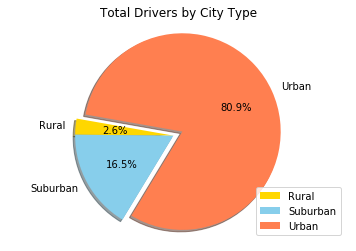

In [119]:
# Calculate Driver Percents
print(city_type_sums_df)

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ['Gold', 'SkyBlue', 'Coral']
explode = [0, 0, 0.1]

plt.pie(city_type_sums_df['driver_count'], labels=labels, colors=colors, explode = explode,
        autopct="%1.1f%%", shadow=True, startangle=170)

plt.title("Total Drivers by City Type")
plt.legend(labels, loc="lower right")
plt.axis("equal")

# Save Figure
plt.savefig("../Images/Drivers_by_city_type.png")

# Show Figure
plt.show()


In [ ]:
# three observable trends based on the data.
# 1.  Urban areas have the most drivers but the lowest average fares.
# 2.  Urban areas have the most rides.
# 3.  Rural areas have the fewest drivers by city.
